# 011 Probability bug Hunt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.0


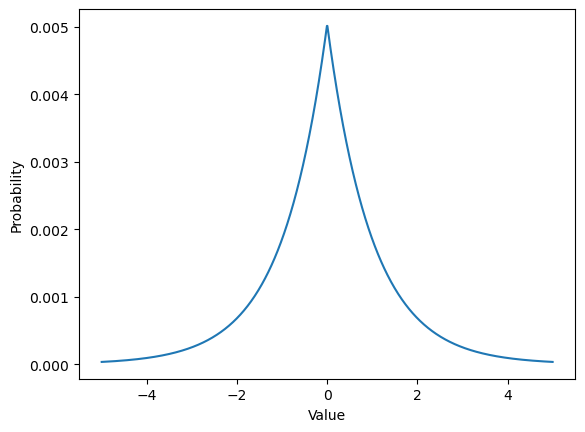

In [2]:
# 1.) Show the laplace probability distribution
x = np.linspace(-5,5,1000)
data = np.exp(-np.abs(x))
data = data / np.sum(data)

print(np.sum(data))

plt.plot(x,data)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()